In [1]:
import os
import re
import cv2
import numpy as np
from keras import backend as KBackend
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

print('Keras backend:', KBackend.backend())
print('Keras image format:', KBackend.image_data_format(), '\n')

Using TensorFlow backend.


Keras backend: tensorflow
Keras image format: channels_last 



In [2]:
model = load_model('log_cnn/rgb-32C3-32C3-64C5-F32-F321_E69_L0.64_A0.66.hdf5')
model.summary()

test_data_generator = ImageDataGenerator()
test_generator = test_data_generator.flow_from_directory(
            os.path.join(os.getcwd(), 'test'),
            target_size=(160, 160),
            classes=['cancer', 'fibro'],
            class_mode='binary',
            color_mode='rgb',            
            batch_size=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_268 (Conv2D)          (None, 158, 158, 32)      896       
_________________________________________________________________
activation_376 (Activation)  (None, 158, 158, 32)      0         
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 77, 77, 32)        9248      
_________________________________________________________________
activation_377 (Activation)  (None, 77, 77, 32)        0         
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_270 (Conv2D)          (None, 36, 36, 64)        18496     
__________

In [3]:
model.evaluate_generator(generator=test_generator, steps=758)

[0.66577800467814519, 0.62928759894459108]

In [4]:
scalar_out = _

In [5]:
print(scalar_out)
print(model.metrics_names)

[0.66577800467814519, 0.62928759894459108]
['loss', 'acc']


In [54]:
class_name = 'fibro'
patient_num = '510'
l = os.listdir(os.path.join('dataset', class_name))
f = [x for x in l if re.match(r'510.*\.png', x)]
print(f)

['510_4_1.png', '510_2_1.png', '510_17_4.png', '510_5_4.png', '510_12_2.png', '510_9_3.png', '510_11_1.png', '510_3_1.png', '510_15_1.png', '510_1_6.png', '510_2_4.png', '510_13_1.png', '510_14_3.png', '510_12_1.png', '510_11_4.png', '510_11_2.png', '510_5_2.png', '510_8_1.png', '510_13_2.png', '510_4_2.png', '510_7_1.png', '510_3_2.png', '510_9_1.png', '510_17_2.png', '510_8_2.png', '510_16_1.png', '510_6_4.png', '510_10_2.png', '510_6_3.png', '510_2_2.png', '510_7_5.png', '510_1_3.png', '510_15_2.png', '510_17_3.png', '510_17_1.png', '510_14_1.png', '510_1_1.png', '510_8_3.png', '510_15_3.png', '510_2_6.png', '510_11_5.png', '510_17_5.png', '510_14_2.png', '510_13_4.png', '510_16_2.png', '510_10_3.png', '510_6_2.png', '510_10_4.png', '510_7_4.png', '510_10_1.png', '510_6_1.png', '510_1_4.png', '510_1_2.png', '510_12_3.png', '510_11_3.png', '510_1_7.png', '510_9_2.png', '510_1_5.png', '510_16_3.png', '510_16_4.png', '510_5_3.png', '510_5_1.png', '510_2_3.png', '510_13_3.png', '510_7_3

In [16]:
patient_generator = test_data_generator.flow_from_directory(
            os.path.join(os.getcwd(), 'successful/test'),
            target_size=(160, 160),            
            color_mode='rgb',
            classes=['fibro'],
            batch_size=1,
            shuffle=False)
prediction = model.predict_generator(generator=patient_generator, steps=len(os.listdir('test/fibro')))

Found 349 images belonging to 1 classes.


In [17]:
can = np.zeros(prediction.shape)
fib = np.zeros(prediction.shape)
can[prediction <= 0.5] = 1
fib[prediction > 0.5] = 1

print('total fam_new:', prediction.shape, 'can:', np.count_nonzero(can), 'fib:', np.count_nonzero(fib))

total fam_new: (349, 1) can: 114 fib: 235


In [145]:
print('rgb-32C3-32C3-64C5-F32-F321_E69_L0.64_A0.66.hdf5')
print('[train] total can: (1632, 1) can: 916 fib: 716')
print('[train] total fib: (1392, 1) can: 494 fib: 898')
print('[test] total can: (400, 1) can: 236 fib: 164')
print('[test] total fib: (336, 1) can: 109 fib: 227')

rgb-32C3-32C3-64C5-F32-F321_E69_L0.64_A0.66.hdf5
[train] total can: (1632, 1) can: 916 fib: 716
[train] total fib: (1392, 1) can: 494 fib: 898
[test] total can: (400, 1) can: 236 fib: 164
[test] total fib: (336, 1) can: 109 fib: 227


In [111]:
print('rgb-32C3-32C3-64C5-F32-F321_E75_L0.68_A0.68.hdf5')
print('[train] total can: (1632, 1) can: 1505 fib: 127')
print('[train] total fib: (1392, 1) can: 892 fib: 500')
print('[test] total can: (400, 1) can: 372 fib: 28')
print('[test] total fib: (336, 1) can: 214 fib: 122')
print()

rgb-32C3-32C3-64C5-F32-F321_E75_L0.68_A0.68.hdf5
[train] total can: (1632, 1) can: 1505 fib: 127
[train] total fib: (1392, 1) can: 892 fib: 500
[test] total can: (400, 1) can: 372 fib: 28
[test] total fib: (336, 1) can: 214 fib: 122



In [255]:
import shutil

class_name = 'cancer'
category = 'test'
target_dir = 'tmp_' + category + '_' + class_name

if class_name == 'cancer' and category == 'test':
    class_path = os.path.join('dataset', class_name)
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)        
    full_can_list = os.listdir(os.path.join('dataset', 'cancer'))
    train_can_list = os.listdir(os.path.join('train', 'cancer'))
    img_list = [x for x in full_can_list if not x in train_can_list]
    patient_ids = []
    for x in img_list:
        p_id = x.split('_')[0]
        if not p_id in patient_ids:
            patient_ids.append(p_id)
    patient_ids = sorted(patient_ids)
    
    for p_id in patient_ids:
        if os.path.exists(os.path.join(target_dir, p_id)):
            continue
            # shutil.rmtree(os.path.join(target_dir, p_id))
        os.mkdir(os.path.join(target_dir, p_id))
        for x in img_list:
            if x.split('_')[0] == p_id:
                shutil.copy(os.path.join(class_path, x), os.path.join(target_dir, p_id, x))
else:
    class_path = os.path.join(category, class_name)
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)
    img_list = os.listdir(class_path)
    patient_ids = []
    for x in img_list:
        p_id = x.split('_')[0]
        if not p_id in patient_ids:
            patient_ids.append(p_id)
    patient_ids = sorted(patient_ids)

    for p_id in patient_ids:
        if os.path.exists(os.path.join(target_dir, p_id)):
            continue
            # shutil.rmtree(os.path.join(target_dir, p_id))
        os.mkdir(os.path.join(target_dir, p_id))
        for x in img_list:
            if x.split('_')[0] == p_id:
                shutil.copy(os.path.join(class_path, x), os.path.join(target_dir, p_id, x))

In [251]:
from tqdm import tqdm

correct = 0
f = open('dist_{}_{}.csv'.format(category, class_name), 'w')
ff = open('{}_{}_pred_distribution.lst'.format(class_name, category), 'w')
#f.write('category, class, id, samples, can_pred, fib_pred\n')
f.write('category, class, id, avg_dist_to_can, avg_dist_to_fib, result\n')

for p_id in patient_ids:
    if not os.path.exists(os.path.join(target_dir, p_id)):
        continue    
    pgen = test_data_generator.flow_from_directory(target_dir,
                                                   target_size=(160, 160), 
                                                   classes=[p_id],
                                                   batch_size=len(os.listdir(os.path.join(target_dir, p_id))), 
                                                   shuffle=False)
    pred = model.predict_generator(generator=pgen, steps=1)
    
    dist_to_can = np.sum(pred)
    dist_to_fib = np.sum(1 - pred)
    
    result = False
    if dist_to_can < dist_to_fib and class_name == 'cancer':
        correct += 1
        result = True
    if dist_to_can >= dist_to_fib and class_name == 'fibro':
        correct += 1
        result = True
    
    f.write('{}, {}, {}, {:.4f}, {:.4f}, {}\n'.format(category, 
                                                      class_name, 
                                                      p_id,                                            
                                                      dist_to_can / pred.shape[0], 
                                                      dist_to_fib / pred.shape[0],
                                                      result))
    
    for dd in pred:
        ff.write('{}, '.format(dd[0]))
    
    """
    can = np.zeros(pred.shape)
    fib = np.zeros(pred.shape)
    can[pred <= 0.5] = 1
    fib[pred > 0.5] = 1
    can_pred = np.count_nonzero(can)
    fib_pred = np.count_nonzero(fib)
    
    if can_pred > fib_pred and class_name == 'cancer':
        correct += 1
    if can_pred <= fib_pred and class_name == 'fibro':
        correct += 1    
    
    f.write('{}, {}, {}, {}, {}, {},\n'.format(category, 
                                               class_name, 
                                               p_id, 
                                               pred.shape[0],
                                               can_pred,
                                               fib_pred))
    """

f.write('correct: {} / {}\n'.format(correct, len(patient_ids)))
ff.close()
f.close()
print('correct:', correct, '/', len(patient_ids))

Found 31 images belonging to 1 classes.
Found 35 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 21 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 21 images belonging to 1 classes.
Found 31 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 18 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
Found 31 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 34 images belonging to 1 classes.
Found 29 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 27 images belonging to 1 classes.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


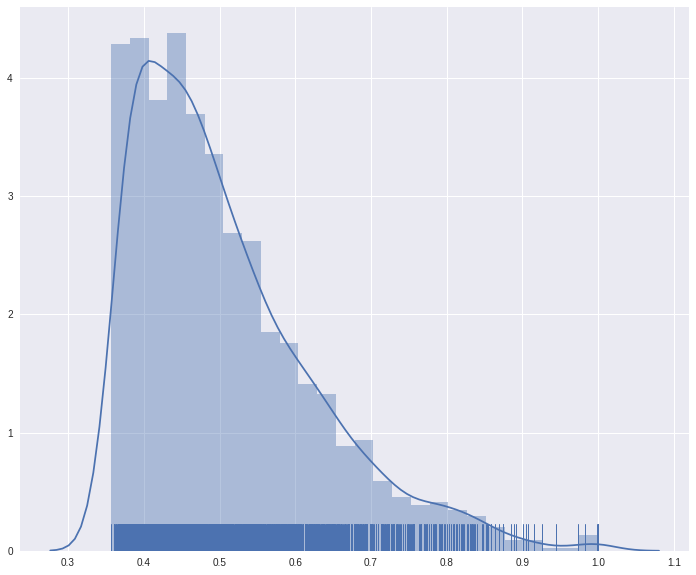

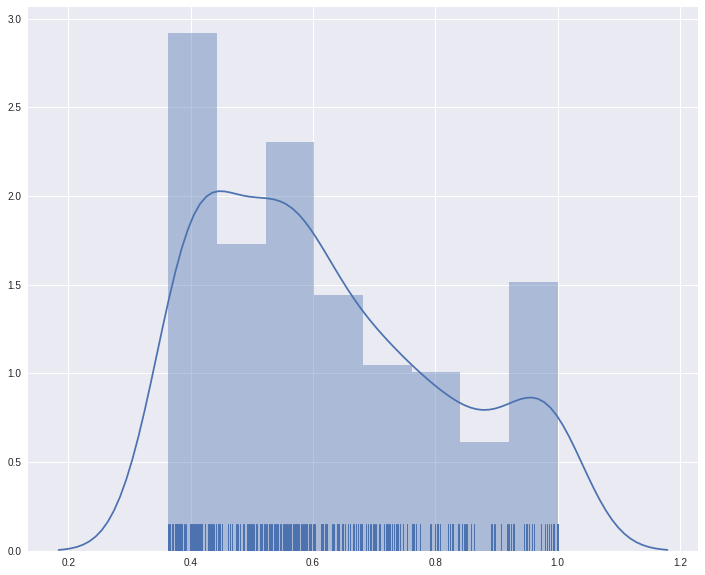

In [23]:
with open('cancer_test_pred_distribution.lst') as o:
    can_values = [float(x.split(',')[0]) for x in o.read().split()]
can_values = np.array(can_values)

with open('fibro_test_pred_distribution.lst') as o:
    fib_values = [float(x.split(',')[0]) for x in o.read().split()]
fib_values = np.array(fib_values)
    
figure(figsize=(12, 10))

fig1 = plt.figure(figsize=(12, 10))
#plt.title('Cancer (training set)', size=24)
sns.distplot(can_values, rug=True, kde=True)

fig2 = plt.figure(figsize=(12, 10))
#plt.title('Fibroadenomatis (training set)', size=24)
sns.distplot(fib_values, rug=True, kde=True)

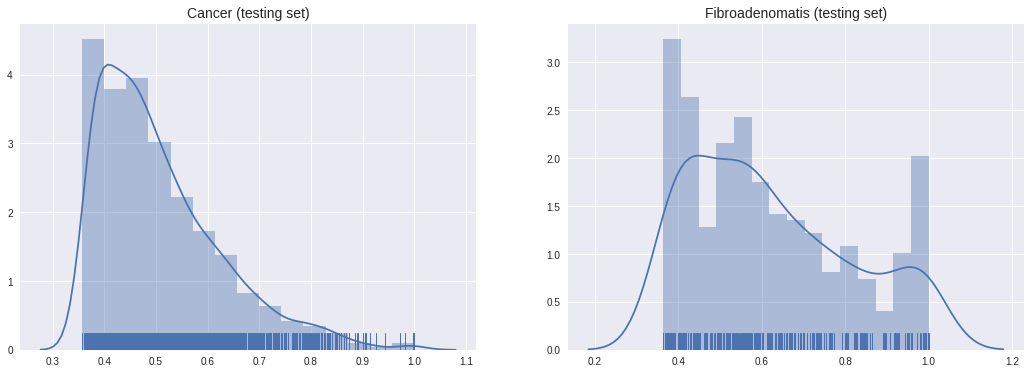

In [253]:
figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title('Cancer (testing set)', size=14)
sns.distplot(can_values, rug=True, kde=True, bins=15)

plt.subplot(1, 2, 2)
plt.title('Fibroadenomatis (testing set)', size=14)
sns.distplot(fib_values, rug=True, kde=True, bins=15)